In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


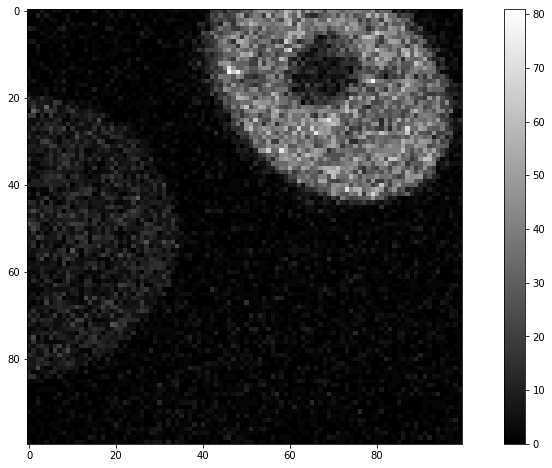

In [5]:
image_intensity = sk.imread("../Data/N2DH-GOWT1/img/t01.tif")
image_intensity = image_intensity[300:400, 400:500]
ip.show_image(image_intensity, 15, 8)

0.24691358024691357


C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]


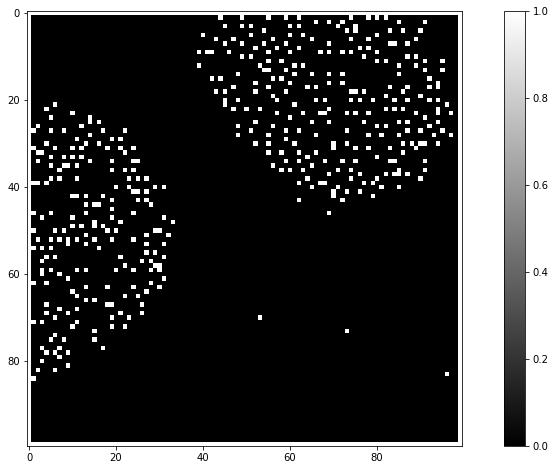

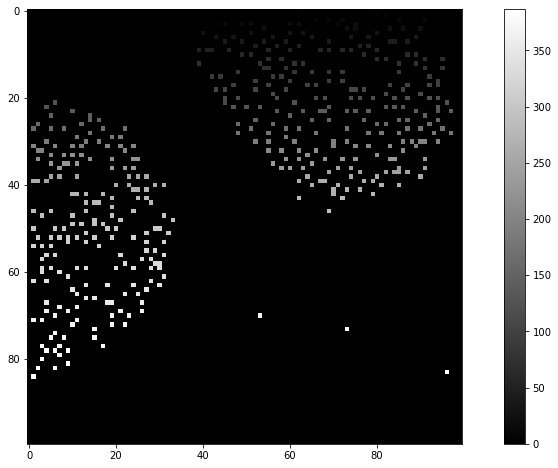

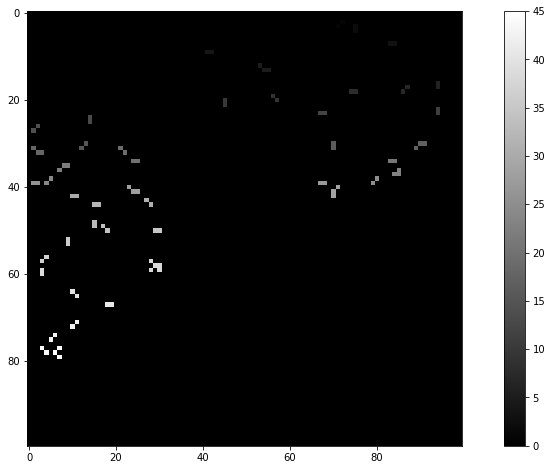

In [19]:
image_seeds1 = sd.seeds(image_intensity, 1)
ip.show_image(image_seeds1, 15, 8)
image_seeds2 = sd.seed_merging(image_seeds1)
ip.show_image(image_seeds2, 15, 8)
image_seeds3 = sd.reduce_region_number(image_seeds2.copy(), 2)
ip.show_image(image_seeds3, 15, 8)
img_seeds2 = Image.fromarray(image_seeds2)
img_seeds2.save("img_seeds2.tif")
img_seeds3 = Image.fromarray(image_seeds3)
img_seeds3.save("img_seeds3.tif")

In [21]:
image_regions = srg.region_growing(image_intensity, image_seeds3)
ip.show_image(image_regions,15,8)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


KeyboardInterrupt: 

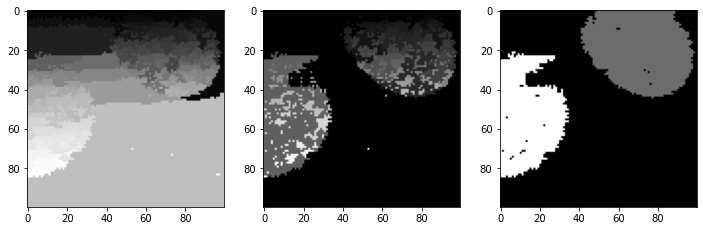

In [8]:
image_for_region_merging = image_regions.copy()
results_region_merging_similarity = rm.distance_merging_while(image_for_region_merging, 0.05, image_intensity)
image_rm_similarity, inter_region_neighbors, means = results_region_merging_similarity
image_rm_size = rm.region_merging_size(image_intensity, image_rm_similarity.copy(), inter_region_neighbors, means, 500)
ip.show_images_side_by_side(image_regions, image_rm_similarity, image_rm_size)

In [11]:
im = Image.fromarray(image_rm_similarity)
im.save("image_rm_similarity.tif")

In [12]:
im2 = Image.fromarray(image_rm_size)
im2.save("image_rm_size.tif")